# Mod 4 Project - Starter Notebook


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [93]:
import datetime
import itertools

import pandas as pd
import matplotlib

In [94]:
df = pd.read_csv("zillow_data.csv")

In [95]:
df.drop("SizeRank", axis=1, inplace=True)

In [96]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       '1996-04', '1996-05', '1996-06', '1996-07',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=271)

In [97]:
df = df.loc[
    (df["State"] == "VA")
    & (df["Metro"] == "Washington")
].copy()

In [98]:
df

,RegionID,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
193,67180,22191,Woodbridge,VA,Washington,Prince William,122600.0,122600.0,122500.0,122500.0,...,296700,297500,298400,299900,301900,303900,305600,307900,310500,311900
247,67182,22193,Woodbridge,VA,Washington,Prince William,127700.0,127800.0,127700.0,127600.0,...,301600,302500,303700,305900,308500,310900,313000,315400,318100,319400
290,66242,20147,Ashburn,VA,Washington,Loudoun,205400.0,205600.0,206000.0,206400.0,...,515200,517800,520900,523500,524600,529100,535500,539100,539500,539600
359,67189,22204,Arlington,VA,Washington,Arlington,178400.0,178400.0,178200.0,177900.0,...,615200,615100,615600,616000,616200,614700,612100,617300,631700,642500
570,67247,22407,Fredericksburg,VA,Washington,Spotsylvania,120400.0,119400.0,118300.0,117400.0,...,252200,253800,254700,255400,257700,260300,262300,263400,263000,261700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,67381,22735,Reva,VA,Washington,Culpeper,101800.0,102200.0,102600.0,103000.0,...,214300,216500,219000,218800,215200,212500,212800,213500,213700,214500
13752,66283,20197,Waterford,VA,Washington,Loudoun,283600.0,285300.0,286900.0,288700.0,...,698100,699300,700600,702200,703900,709000,713800,717900,719000,717500
13934,66233,20137,Broad Run,VA,Washington,Prince William,200800.0,200800.0,200800.0,200900.0,...,466400,465800,464800,464400,463600,462500,463500,467000,472300,477900
14274,67388,22742,Sumerduck,VA,Washington,Fauquier,128000.0,127800.0,127500.0,127200.0,...,281600,282600,283600,284200,284800,283700,280200,280600,285300,289100


# Step 2: Reshape from Wide to Long Format

In [99]:
def get_datetimes(df):
	return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [100]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID','City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby(['time']).aggregate({'value':'mean'})

In [101]:
house_price_df = melt_data(df)

In [102]:
house_price_df

,value
time,
1996-04-01,199502.857143
1996-05-01,199369.523810
1996-06-01,199204.761905
1996-07-01,199049.523810
1996-08-01,198929.523810
...,...
2017-12-01,514926.666667
2018-01-01,516926.666667
2018-02-01,520250.476190


# Step 3: EDA and Visualization

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

font = {'family' : 'normal',
		'weight' : 'bold',
		'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!


<AxesSubplot:xlabel='time', ylabel='value'>

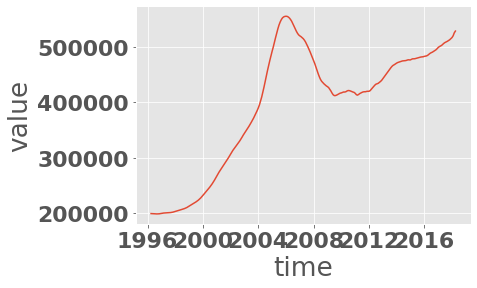

In [104]:
sns.lineplot(data=house_price_df["value"])


In [105]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

In [106]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

New Best Summary:
                                SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:                          ARIMA   Log Likelihood               -4064.851
Date:                Thu, 10 Jun 2021   AIC                           8133.702
Time:                        20:28:30   BIC                           8140.862
Sample:                    04-01-1996   HQIC                          8136.579
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.95e+05   1.83e+06      0.216      0.829   -3.19e+06    3.98e+06
sigma2      3.338e+12   4.12e+11      8.109      0.000    2.53e+12    4.15e+12
Ljung-Box (L1) (Q):              

c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


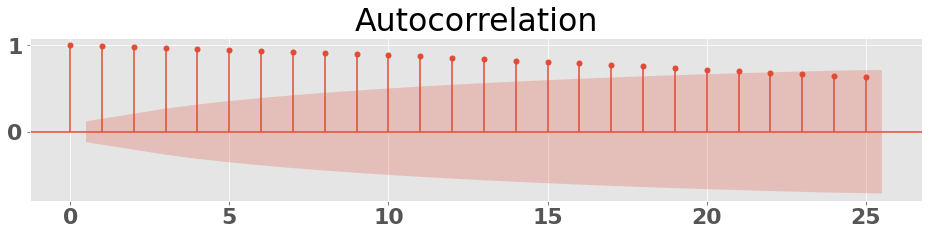

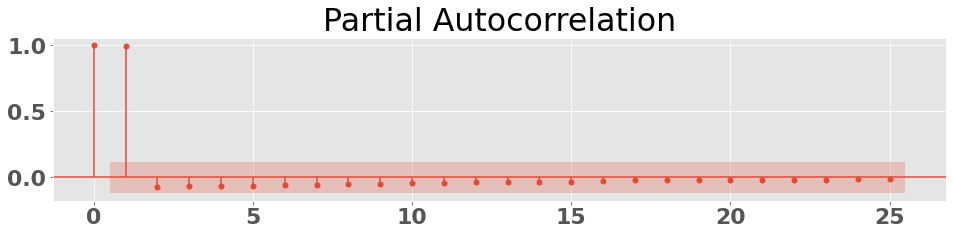

In [107]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(house_price_df['value'].dropna(axis=0), ax=ax)
fig2, ax2 = plt.subplots(figsize=(16,3))
plot_pacf(house_price_df['value'].dropna(axis=0), ax=ax2)

mod_arma = ARIMA(house_price_df["value"], order=(0, 0, 0), trend="c")
res_arma=mod_arma.fit()
print("New Best Summary:\n", res_arma.summary())

Autocorrelation is positive past 10 lags. Needs at least one difference.

New Best Summary:
                                SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2507.660
Date:                Thu, 10 Jun 2021   AIC                           5017.320
Time:                        20:28:30   BIC                           5020.896
Sample:                    04-01-1996   HQIC                          5018.757
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.038e+07    7.2e+05     14.430      0.000    8.97e+06    1.18e+07
Ljung-Box (L1) (Q):                 257.75   Jarque-Bera (JB):                18.85
Prob(Q):                    

c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


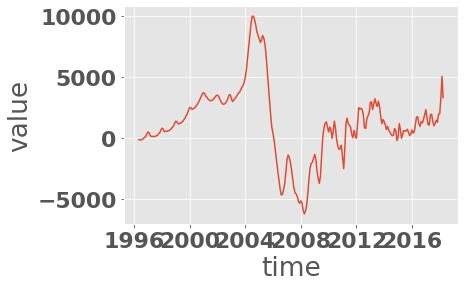

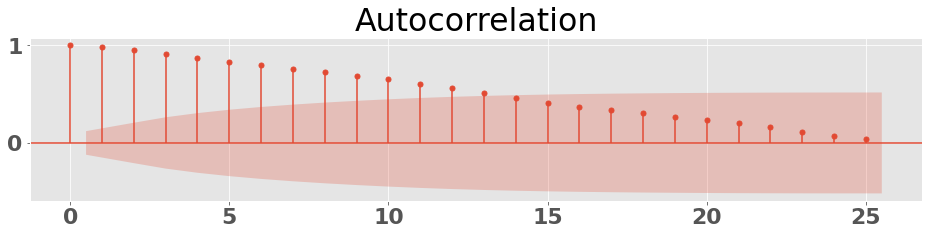

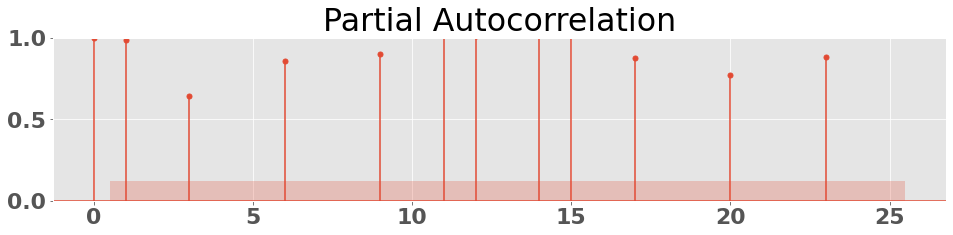

In [108]:
house_price_diff = house_price_df.diff(periods=1)
sns.lineplot(data=house_price_diff["value"])

house_price_diff.dropna(axis=0, inplace=True)

fig3, ax3 = plt.subplots(figsize=(16,3))
plot_acf(house_price_diff, ax=ax3)
fig4, ax4 = plt.subplots(figsize=(16,3))
ax4.set_ylim(0,1)
plot_pacf(house_price_diff, ax=ax4, )

mod_arma = ARIMA(house_price_df["value"], order=(0, 1, 0))
res_arma=mod_arma.fit()
print("New Best Summary:\n", res_arma.summary())

Autocorrelation is positive past 10 lags. Needs another difference.

New Best Summary:
                                SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -2026.174
Date:                Thu, 10 Jun 2021   AIC                           4054.347
Time:                        20:28:30   BIC                           4057.920
Sample:                    04-01-1996   HQIC                          4055.783
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.868e+05    1.8e+04     15.938      0.000    2.52e+05    3.22e+05
Ljung-Box (L1) (Q):                  64.68   Jarque-Bera (JB):                44.02
Prob(Q):                    

c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


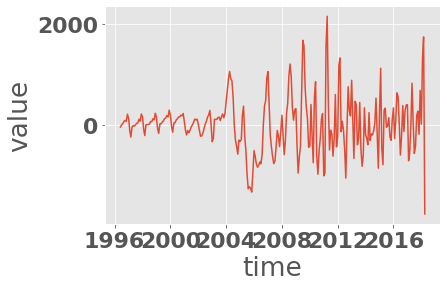

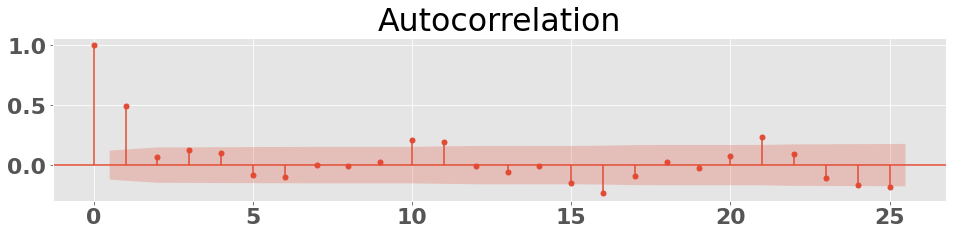

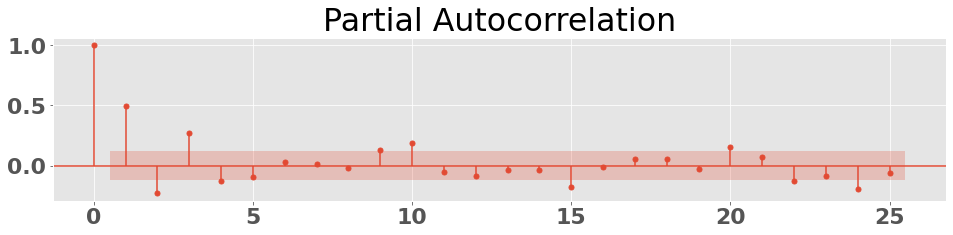

In [109]:
house_price_diff2 = house_price_diff.diff(periods=1)
sns.lineplot(data=house_price_diff2["value"])

house_price_diff2.dropna(axis=0, inplace=True)
house_price_diff2

fig5, ax5 = plt.subplots(figsize=(16,3))
plot_acf(house_price_diff2, ax=ax5)
fig6, ax6 = plt.subplots(figsize=(16,3))
plot_pacf(house_price_diff2, ax=ax6)

mod_arma = ARIMA(house_price_df["value"], order=(0, 2, 0))
res_arma=mod_arma.fit()
print("New Best Summary:\n", res_arma.summary())

New Best Summary:
                                SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -2026.096
Date:                Thu, 10 Jun 2021   AIC                           4056.191
Time:                        20:28:31   BIC                           4063.335
Sample:                    04-01-1996   HQIC                          4059.062
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.5707     16.908      0.389      0.698     -26.568      39.710
sigma2      2.862e+05   1.85e+04     15.445      0.000     2.5e+05    3.23e+05
Ljung-Box (L1) (Q):              

c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


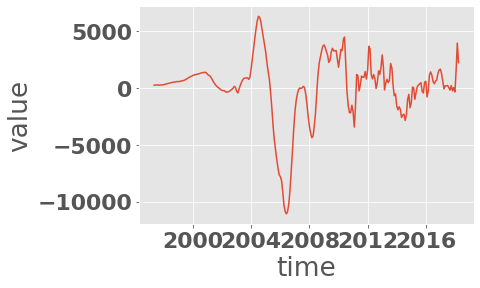

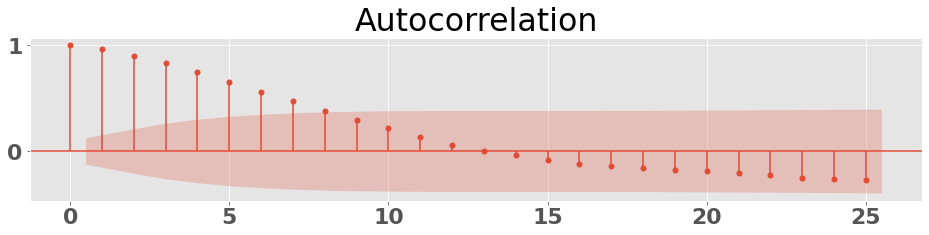

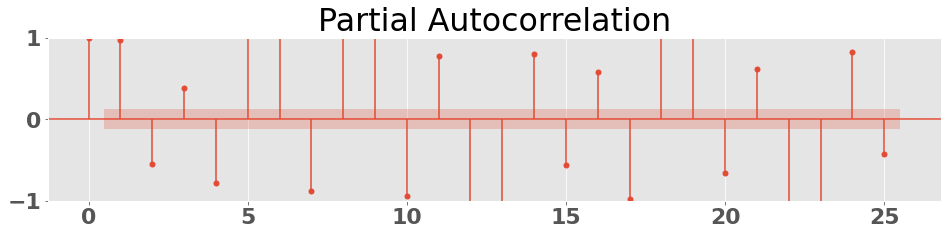

In [110]:
house_price_diffs = house_price_diff.diff(periods=12)
sns.lineplot(data=house_price_diffs["value"])

house_price_diffs.dropna(axis=0, inplace=True)
house_price_diffs

fig7, ax7 = plt.subplots(figsize=(16,3))
plot_acf(house_price_diffs, ax=ax7)
fig8, ax8 = plt.subplots(figsize=(16,3))
plot_pacf(house_price_diffs, ax=ax8)
ax8.set_ylim(-1,1)

mod_arma = ARIMA(house_price_df["value"], order=(0, 2, 0), trend=[0,0,1])
res_arma=mod_arma.fit()
print("New Best Summary:\n", res_arma.summary())

## EDA + Visualization Analysis
### Graph
2 non-seasonal differences looks best. It looks most stationary, but variance seems to change over time.

### Heteroskedasticity
Negligible difference between seasonal + Non-seasonal models.
### ACF
2 non-seasonal differences looks best. There are still a number of significant lags, with no pattern.

### PACF
2 non-seasonal differences looks best. There are still a number of significant lags, with no pattern.

### Summary
The data is almost suitable for ARIMA analysis, but heteroskedasticity is too high.

The variance change looks like it is mostly the same between 1996-2004 and 2008-present. I will only use 2008+ data for the model.


## EDA + Visualization (2008+)

In [111]:
from dateutil.parser import isoparse
recent_house_price_df = house_price_df[house_price_df.index > isoparse('20071201')].copy()
recent_house_price_df

,value
time,
2008-01-01,475176.190476
2008-02-01,469799.047619
2008-03-01,463845.714286
2008-04-01,457592.380952
2008-05-01,451570.476190
...,...
2017-12-01,514926.666667
2018-01-01,516926.666667
2018-02-01,520250.476190


<AxesSubplot:xlabel='time', ylabel='value'>

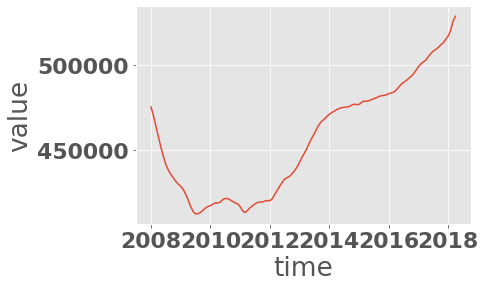

In [112]:
sns.lineplot(data=recent_house_price_df["value"])

Summary:
                                SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  122
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1003.339
Date:                Thu, 10 Jun 2021   AIC                           2008.679
Time:                        20:28:31   BIC                           2011.466
Sample:                    03-01-2008   HQIC                          2009.811
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.071e+06   1.17e+05      9.161      0.000    8.42e+05     1.3e+06
Ljung-Box (L1) (Q):                   4.04   Jarque-Bera (JB):                 7.26
Prob(Q):                             

c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\kiwini\.virtualenvs\dsc-phase-4-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


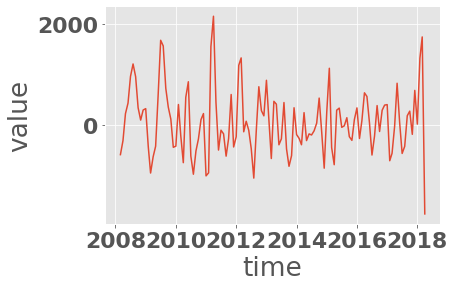

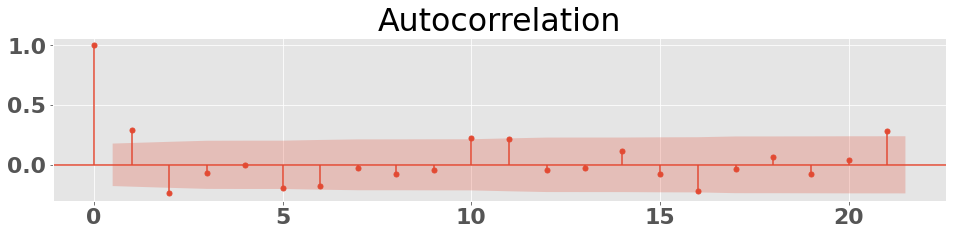

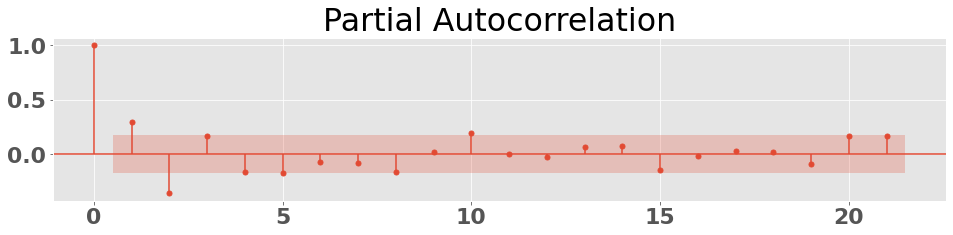

In [113]:
recent_house_price_diff = recent_house_price_df.diff(periods=1)
recent_house_price_diff2 = recent_house_price_diff.diff(periods=1)
sns.lineplot(data=recent_house_price_diff2["value"])

recent_house_price_diff2.dropna(axis=0, inplace=True)

fig9, ax9 = plt.subplots(figsize=(16,3))
plot_acf(recent_house_price_diff2, ax=ax9)
fig0, ax0 = plt.subplots(figsize=(16,3))
plot_pacf(recent_house_price_diff2, ax=ax0)

mod_arma = ARIMA(recent_house_price_diff2["value"], order=(0, 2, 0))
res_arma=mod_arma.fit()
print("Summary:\n", res_arma.summary())

In [114]:
recent_house_price_df = recent_house_price_df.asfreq("MS")


## EDA + Visualization Analysis (2008+ Data)

### Heteroscedasticity
Dropped from 20+ to 1.33. More appropriate for ARIMA modelling

### ACF
Most of the lags that were clearly "significant" before are now inside the shaded area. Looks easier to model!

### PACF
Most of the lags that were clearly "significant" before are now inside the shaded area. Looks easier to model!

# Step 5: ARIMA Modeling

The following code is adapted from a [tutorial](https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/) on Grid Searching, but changed to use Bayesian Search instead to better search a large state space in finite time.

In [115]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Validation functions. Take in a model and return a "score" that can be used to compare models.
# measure_rmse + train_test_split + sarima_forecast are helper functions for walk_forward_validation

# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# one-step sarima forecast
def sarima_forecast(history, config, prior_arima_result=None):
	"""Train a model + make 1 month forecast"""
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)

	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	"""Return a score based on `n_test` one month forecasts.

	Model is retrained before each forecast on data up to the month of forecast.
	"""
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]

	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

def bic_validation(data, n_test, cfg):
	order, sorder, trend = cfg
	# define model
	model = SARIMAX(data, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	return model_fit.bic

In [155]:
from hyperopt import hp, fmin, tpe, Trials
# grid search sarima hyperparameters
from math import sqrt
import time
from warnings import catch_warnings
from warnings import filterwarnings

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False, score_func=bic_validation):
	start_time = time.time()
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = score_func(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = score_func(data, n_test, cfg)
		except Exception as e:
			print("Error:", e)
			error = None
	# check for an interesting result
	if result is not None:
		print(f'Model: {key} | Fit time (s): {time.time() - start_time} | RMSE: {result}')
	return (key, result)


def bayesian_search(data, timeout=5*60, n_test=6, score_func=bic_validation):
	"""Bayesian search over a large state space.

	Explore p and q from 0 up to 30 (900 combinations).

    Tried extra configurations (Seasonal-MA + Seasonal-AR) because final model wasn't good, and wanted to try
    everything I could think of to make it better.
    They're commented out because they fit slower and are worse. Uncomment to check them out.
    """

	space = hp.choice('seasonality', [
	#  {
    #     'type': "Seasonal-MA",
	# 	'p': hp.randint('p_sma', 0, 10),
	# 	'd': hp.choice('d_sma', [1]),
	# 	'q': hp.randint('q_sma', 0, 10),
	# 	't': hp.choice('t_sma', ['n', 'c', 't', 'ct']),
	# 	'P': hp.choice('P_sma', [0]),
	# 	'D': hp.choice('D_sma', [1]),
	# 	'Q': hp.randint('Q_sma', 0, 10),
	# 	'm': hp.choice('m_sma', [12]),
	# },
	# {
	# 	'type': "Seasonal-AR",
	# 	 'p': hp.randint('p_sar', 0, 10),
	# 		'd': hp.choice('d_sar', [1]),
	# 		'q': hp.randint('q_sar', 0, 10),
	# 		't': hp.choice('t_sar', ['n', 'c', 't', 'ct']),
	# 		'P': hp.randint('Q_sar', 0, 10),
	# 		'D': hp.choice('D_sar', [1]),
	# 		'Q': hp.choice('P_sar', [0]),
	# 		'm': hp.choice('m_sar', [12]),
	# },
	{
        'type': "Non-Seasonal AR",
			'p': hp.quniform('p_nar', 0, 31, 1),
			'd': hp.choice('d_nar', [2]),
			'q': hp.quniform('q_nar', 0, 3, 1),
			't': hp.choice('t_nar', [None]),
	},
	{
		'type': "Non-seasonal MA",
		'p': hp.quniform('p_nma', 0, 3, 1),
		'd': hp.choice('d_nma', [2]),
		'q': hp.quniform('q_nma', 0, 31, 1),
		't': hp.choice('t_nma', [None]),
	}]
	)
	def bayesian_objective_function(d):
		if 'm' in d.keys():
			cfg = [(d['p'],d['d'], d['q']), (d['P'],d['D'],d['Q'],d['m']), d['t']]
			#cfg = [(d['p'],d['d'], d['q']), (d['P'],d['D'],d['Q'],d['m']), None]
		else:
			cfg = [(d['p'],d['d'], d['q']), None, d['t']]
			#cfg = [(d['p'],d['d'], d['q']), None, None]
		key, result = score_model(data, n_test=n_test, cfg=cfg, score_func=score_func)
		if result is None:
			return {
				"key": key,
				"status": "fail"
			}
		else:
			return {
				"key": key,
				"status": "ok",
				"loss": result
			}
	bayes_trials = Trials()
	best = fmin(
		bayesian_objective_function,
		space=space,
		algo=tpe.suggest,
		timeout=timeout,
		trials=bayes_trials,
				)
	return best

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True, score_func=bic_validation):
	scores = [score_model(data, n_test, cfg, score_func=score_func) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

## ARIMA Model (Hand-selected Parameters)

With no obvious patterns in the ACF + PACF graphs, I tried a (0, 2, 0) model to start.

In [120]:
model = SARIMAX(recent_house_price_df["value"], order=(0,2,0))
model_fit = model.fit(disp=False)

In [121]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  124
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -963.100
Date:                Thu, 10 Jun 2021   AIC                           1928.200
Time:                        20:41:20   BIC                           1931.004
Sample:                    01-01-2008   HQIC                          1929.339
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       4.21e+05   4.46e+04      9.447      0.000    3.34e+05    5.08e+05
===================================================================================
Ljung-Box (L1) (Q):                  10.78   Jarque-Bera (JB):                 8.65
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               0.61   Skew:                             0.55
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [122]:
model_fit.params

sigma2    420999.187472
dtype: float64

In [124]:
score_model(recent_house_price_df["value"], n_test=24, cfg=[(0,2,0), None, None], score_func=walk_forward_validation)

Model: [(0, 2, 0), None, None] | Fit time (s): 0.14162111282348633 | RMSE: 698.3075317645577


('[(0, 2, 0), None, None]', 698.3075317645577)

## ARIMA Results (Hand-selected Parameters)
RMSE of $698
BIC of 1931

## Grid Search Low p, q values

In [132]:
import itertools
cfg_list = list([(p, 2, q), None, None]
					  for (p, q) in itertools.product(
							range(11),
							range(11)
					  ))
grid_search(recent_house_price_df["value"], cfg_list, n_test=6, score_func=bic_validation)

Model: [(0, 2, 0), None, None] | Fit time (s): 0.012964010238647461 | RMSE: 1915.4188002935916
Model: [(0, 2, 1), None, None] | Fit time (s): 0.04188728332519531 | RMSE: 1891.8156660528407
Model: [(0, 2, 2), None, None] | Fit time (s): 0.028922557830810547 | RMSE: 1861.139409755614
Model: [(0, 2, 3), None, None] | Fit time (s): 0.031914710998535156 | RMSE: 1843.7158961250257
Model: [(0, 2, 4), None, None] | Fit time (s): 0.09474706649780273 | RMSE: 1814.7112661017152
Model: [(0, 2, 5), None, None] | Fit time (s): 0.06682229042053223 | RMSE: 1804.1935803535523
Model: [(0, 2, 6), None, None] | Fit time (s): 0.13267064094543457 | RMSE: 1788.7787528588044
Model: [(0, 2, 7), None, None] | Fit time (s): 0.24897146224975586 | RMSE: 1771.4900187136798
Model: [(0, 2, 8), None, None] | Fit time (s): 0.4258861541748047 | RMSE: 1764.9989074250389
Model: [(0, 2, 9), None, None] | Fit time (s): 0.33408212661743164 | RMSE: 1748.3110933603602
Model: [(0, 2, 10), None, None] | Fit time (s): 0.387962341

[('[(2, 2, 10), None, None]', 1738.8169638003285),
 ('[(0, 2, 10), None, None]', 1741.6145241238994),
 ('[(1, 2, 10), None, None]', 1745.6636269002163),
 ('[(0, 2, 9), None, None]', 1748.3110933603602),
 ('[(4, 2, 10), None, None]', 1751.4904727012622),
 ('[(3, 2, 10), None, None]', 1751.9307007097996),
 ('[(2, 2, 9), None, None]', 1752.0969368864278),
 ('[(1, 2, 9), None, None]', 1752.7150249608173),
 ('[(5, 2, 10), None, None]', 1756.2148121581345),
 ('[(10, 2, 0), None, None]', 1757.4920831978673),
 ('[(6, 2, 10), None, None]', 1758.4459609458816),
 ('[(3, 2, 9), None, None]', 1761.6913078387092),
 ('[(10, 2, 1), None, None]', 1763.981547988379),
 ('[(0, 2, 8), None, None]', 1764.9989074250389),
 ('[(10, 2, 2), None, None]', 1765.5679620921574),
 ('[(8, 2, 10), None, None]', 1768.3417536235027),
 ('[(1, 2, 8), None, None]', 1768.7897016300146),
 ('[(10, 2, 3), None, None]', 1769.832617345393),
 ('[(2, 2, 8), None, None]', 1770.4891402137528),
 ('[(3, 2, 8), None, None]', 1770.566567

## ARIMA Results (low p,q grid search):
I started with grid searching p < 4 and q < 4. I expanded it when the best result came with max allowed p, q: (3, 2, 3).
I made the grid bigger multiple times, but always the best result was biggest allowed p+q.

I stopped grid search after (10, 2, 10) and tried a bayesian search with bigger allowed parameters.

### Top 3 models (by BIC)
Model: [(2, 2, 10), None, None] | Fit time (s): <1 | BIC: 1738.8169638003285
Model: [(0, 2, 10), None, None] | Fit time (s): <1 | BIC: 1741.6145241238994
Model: [(1, 2, 10), None, None] | Fit time (s): <1 | BIC: 1745.6636269002163

In [156]:
best = bayesian_search(recent_house_price_df["value"], timeout=30 * 60, n_test=6)
print(best)

Model: [(5.0, 2, 2.0), None, None] | Fit time (s): 0.11269950866699219 | RMSE: 1833.705239022815
Model: [(2.0, 2, 25.0), None, None] | Fit time (s): 2.3238134384155273 | RMSE: 1554.0786600812817               
Model: [(2.0, 2, 25.0), None, None] | Fit time (s): 2.1372878551483154 | RMSE: 1554.0786600812817                 
Model: [(0.0, 2, 15.0), None, None] | Fit time (s): 0.6462714672088623 | RMSE: 1673.2834959633158                 
Model: [(1.0, 2, 29.0), None, None] | Fit time (s): 3.1406290531158447 | RMSE: 1531.635063770194                  
Model: [(3.0, 2, 28.0), None, None] | Fit time (s): 3.136613607406616 | RMSE: 1520.7070317323107                  
Model: [(16.0, 2, 3.0), None, None] | Fit time (s): 0.6801817417144775 | RMSE: 1692.5542587480477                 
Model: [(2.0, 2, 11.0), None, None] | Fit time (s): 0.5236027240753174 | RMSE: 1732.0800952959826                 
Model: [(8.0, 2, 1.0), None, None] | Fit time (s): 0.22043633460998535 | RMSE: 1784.756874556231    

KeyboardInterrupt: 

## ARIMA Results (2 Hr. Bayesian Search):
I used BIC to choose the best models  to try to fit the smallest model possible to avoid overfitting.
RMSE is too slow during the search, but I used it to compare models with different orders of difference and select a final model.
BIC penalizes additional terms more heavily than AIC, but the best models

### Top 3 models (by BIC)
* Model: [(31.0, 2, 0.0), None, None] | Fit time (s): 0.7021899223327637 | BIC: 1499.8009477407797
* Model: [(30.0, 2, 0.0), None, None] | Fit time (s): 0.17470240592956543 | BIC: 1510.974495208657
* Model: [(3.0, 2, 28.0), None, None] | Fit time (s): 3.136613607406616 | BIC: 1520.7070317323107

The non-seasonal model uses the most AR terms allowed in our search (30), with 0 or a couple of MA terms.

### Comparison to Hand-Selected Model
BIC is higher for all 3 than our (0,2,0) model.

In [ ]:
# Check RMSE for Bayesian models
top_configs = [
	# Worst config by BIC, just to see difference
	[(8, 2, 4), None, None],
	# From first grid search
	[(3, 2, 3), None, None],
	# From larger grid search
	[(2, 2, 10), None, None],
	[(0, 2, 10), None, None],
	[(1, 2, 10), None, None],
	# From bayesian_search
	[(31, 2, 0), None, None],
	[(30, 2, 0), None, None],
	[(3, 2, 28), None, None],
]

for cfg in top_configs:
	score_model(recent_house_price_df["value"], n_test=24, cfg=cfg, score_func=walk_forward_validation)

Model: [(8, 2, 4), None, None] | Fit time (s): 10.607648849487305 | RMSE: 3251742.5619525746
Model: [(3, 2, 3), None, None] | Fit time (s): 3.701350212097168 | RMSE: 689.8407717617903
Model: [(2, 2, 10), None, None] | Fit time (s): 7.394841432571411 | RMSE: 761.8897648927265
Model: [(0, 2, 10), None, None] | Fit time (s): 8.144782543182373 | RMSE: 770.9269503353206
Model: [(1, 2, 10), None, None] | Fit time (s): 9.16835355758667 | RMSE: 757.4968072990458
Model: [(31, 2, 0), None, None] | Fit time (s): 29.643099784851074 | RMSE: 766.3138167074713
Model: [(30, 2, 0), None, None] | Fit time (s): 15.25999116897583 | RMSE: 755.8501004825118


### Top models (RMSE)
* Model: [(3, 2, 3), None, None] | Fit time (s): 3.874885082244873 | RMSE: 689.8407717617903
* Model: [(2, 2, 10), None, None] | Fit time (s): 7.570343255996704 | RMSE: 761.8897648927265
* Model: [(0, 2, 10), None, None] | Fit time (s): 8.15896463394165 | RMSE: 770.9269503353206
* Model: [(1, 2, 10), None, None] | Fit time (s): 9.20403242111206 | RMSE: 757.4968072990458
* Model: [(31, 2, 0), None, None] | Fit time (s): 29.67447853088379 | RMSE: 766.3138167074713
* Model: [(30, 2, 0), None, None] | Fit time (s): 15.325401782989502 | RMSE: 755.8501004825118
* Model:	[(3, 2, 28), None, None] | ERROR

### Analysis
BIC gets better and better with larger parameter sizes, but the prediction error does not improve over small p,q

I want to do one last small grid search directly optimizing RMSE

In [161]:
cfg_list = list([(p, 2, q), None, None]
					  for (p, q) in itertools.product(
							range(4),
							range(4)
					  ))
grid_search(recent_house_price_df["value"], cfg_list, n_test=24, score_func=walk_forward_validation)

Model: [(0, 2, 0), None, None] | Fit time (s): 0.13982772827148438 | RMSE: 698.3075317645577
Model: [(0, 2, 1), None, None] | Fit time (s): 0.7674069404602051 | RMSE: 700.7497223117985
Model: [(0, 2, 2), None, None] | Fit time (s): 0.6070120334625244 | RMSE: 735.7782893163704
Model: [(0, 2, 3), None, None] | Fit time (s): 1.3775203227996826 | RMSE: 722.6301848882089
Model: [(1, 2, 0), None, None] | Fit time (s): 0.1199331283569336 | RMSE: 743.9272698396367
Model: [(1, 2, 1), None, None] | Fit time (s): 0.8196494579315186 | RMSE: 699.6375025312204
Model: [(1, 2, 2), None, None] | Fit time (s): 0.6418993473052979 | RMSE: 732.547587699774
Model: [(1, 2, 3), None, None] | Fit time (s): 2.654660940170288 | RMSE: 709.8279926596362
Model: [(2, 2, 0), None, None] | Fit time (s): 0.13187003135681152 | RMSE: 695.0346788923246
Model: [(2, 2, 1), None, None] | Fit time (s): 0.958806037902832 | RMSE: 695.1955605367339
Model: [(2, 2, 2), None, None] | Fit time (s): 1.7949247360229492 | RMSE: 773.833

[('[(3, 2, 3), None, None]', 689.8407717617903),
 ('[(2, 2, 0), None, None]', 695.0346788923246),
 ('[(2, 2, 1), None, None]', 695.1955605367339),
 ('[(0, 2, 0), None, None]', 698.3075317645577),
 ('[(1, 2, 1), None, None]', 699.6375025312204),
 ('[(0, 2, 1), None, None]', 700.7497223117985),
 ('[(3, 2, 2), None, None]', 708.02489574585),
 ('[(1, 2, 3), None, None]', 709.8279926596362),
 ('[(2, 2, 3), None, None]', 715.096536300541),
 ('[(3, 2, 0), None, None]', 715.6670956939015),
 ('[(3, 2, 1), None, None]', 715.8735032093646),
 ('[(0, 2, 3), None, None]', 722.6301848882089),
 ('[(1, 2, 2), None, None]', 732.547587699774),
 ('[(0, 2, 2), None, None]', 735.7782893163704),
 ('[(1, 2, 0), None, None]', 743.9272698396367),
 ('[(2, 2, 2), None, None]', 773.8336130022049)]

## Final ARIMA Model
(0,2,0) is very close to the best model I found, with minimal overfitting risk. We will do some forecasting with this model.

In [162]:
model = SARIMAX(recent_house_price_df["value"], order=(0,2,0))


# Step 6: Interpreting Results
Let's use some visuals to see how our model is doing.

In [170]:
start_date = pd.to_datetime("2008-01-01")
pred_start_date = pd.to_datetime("2016-01-01")
#pred_start_date = pd.to_datetime("2017-07-01")
end_date = recent_house_price_df.index[-1]
observed= recent_house_price_df[recent_house_price_df.index >= start_date]

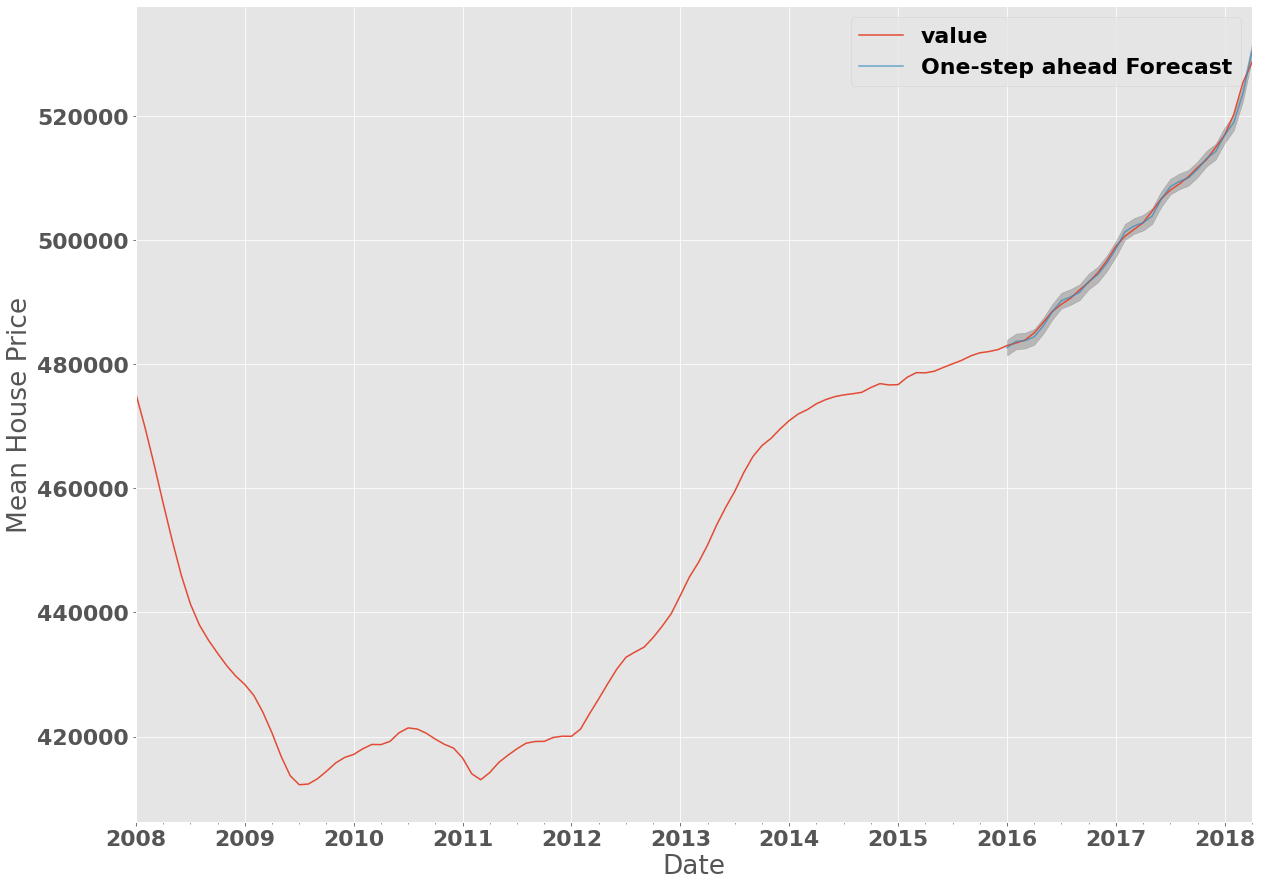

In [171]:
pred = model_fit.get_prediction(start=pred_start_date, dynamic=False)
pred_ci = pred.conf_int()
ax_static = observed.plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax_static, label='One-step ahead Forecast', alpha=.7)

ax_static.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax_static.set_xlabel('Date')
ax_static.set_ylabel('Mean House Price')
plt.legend()

plt.show()

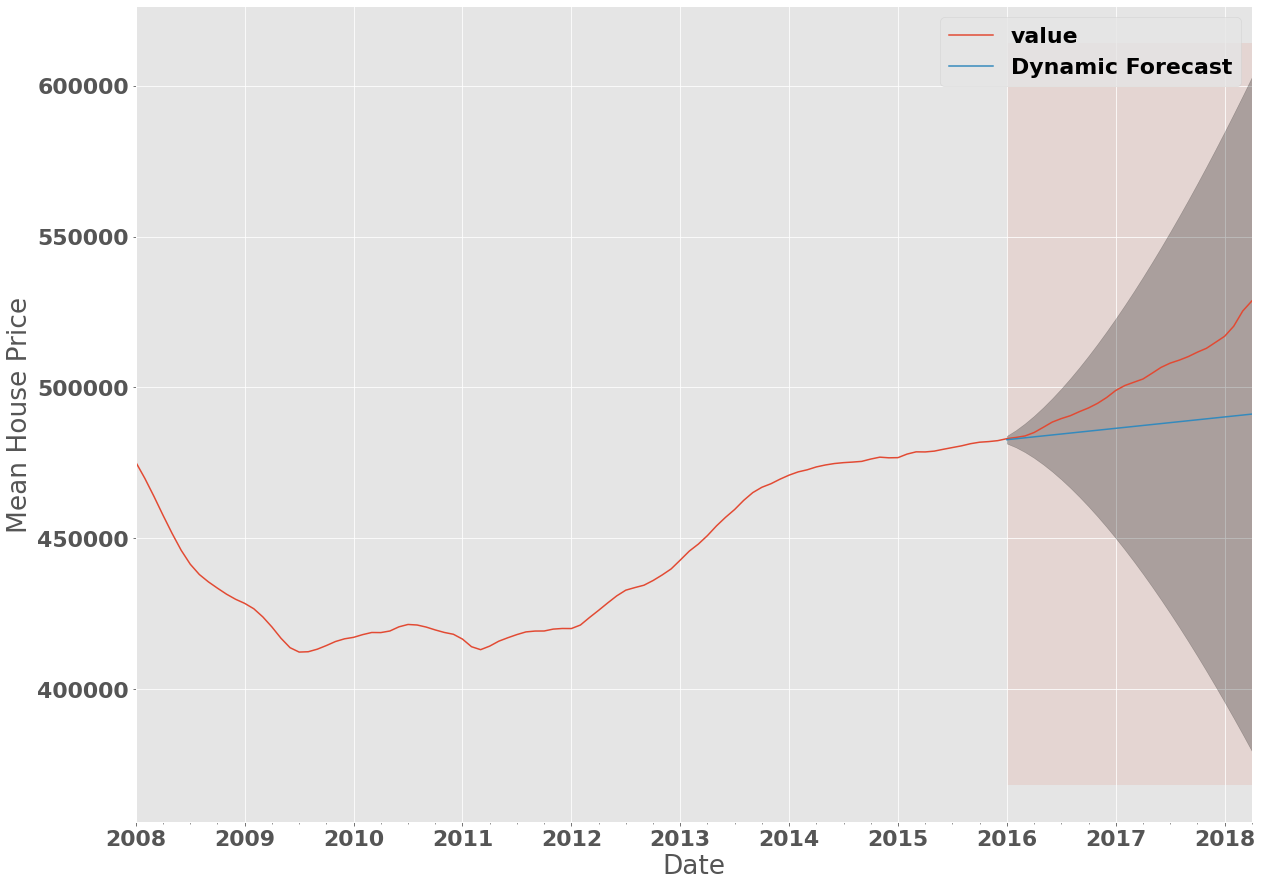

In [172]:
pred_dynamic = model_fit.get_prediction(start=pred_start_date, dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax_dyn = observed.plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax_dyn)

ax_dyn.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax_dyn.fill_betweenx(ax_dyn.get_ylim(), pred_start_date, end_date,
                 alpha=.1, zorder=-1)


ax_dyn.set_xlabel('Date')
ax_dyn.set_ylabel('Mean House Price')
plt.legend()

plt.show()

## Zoomed in

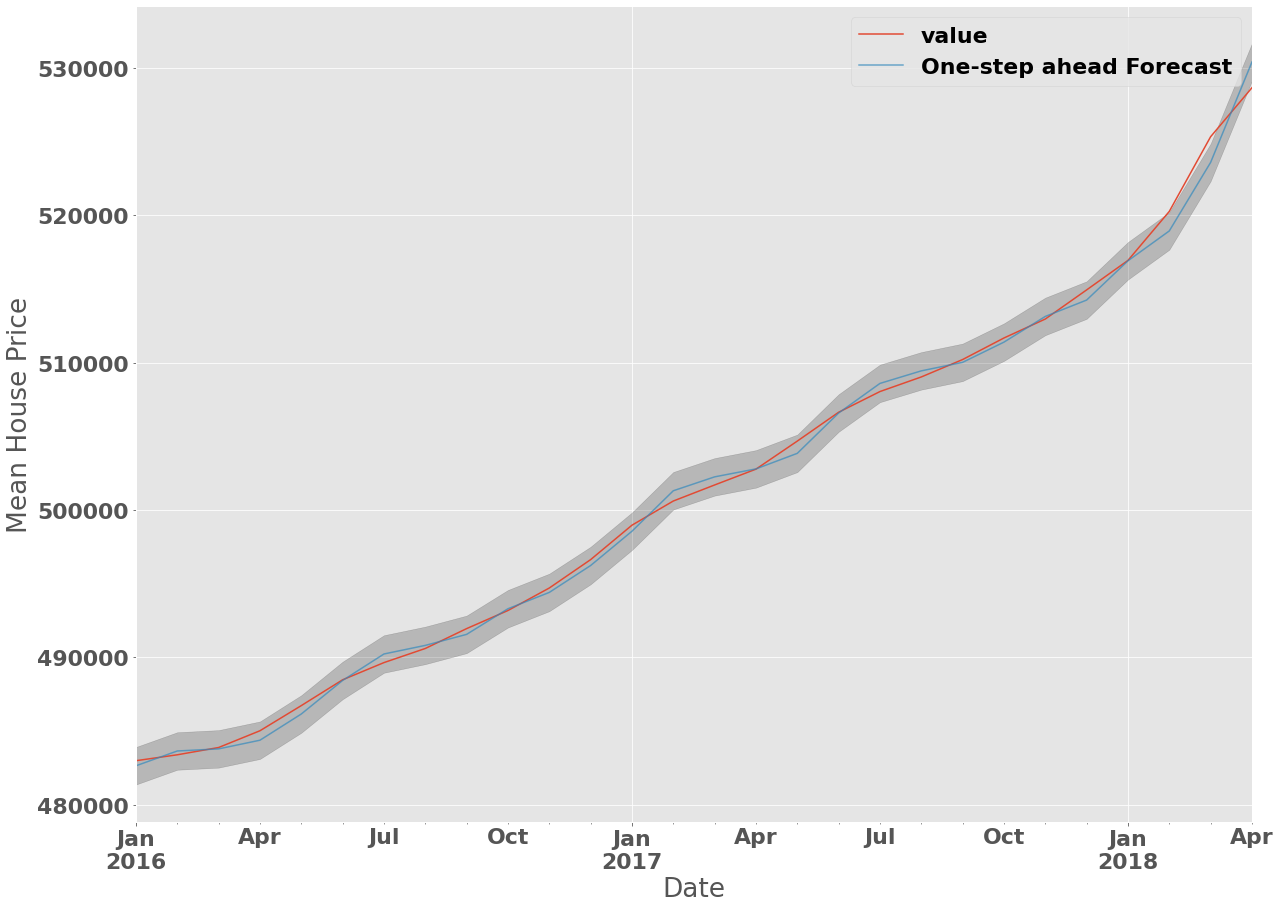

In [173]:
observed= recent_house_price_df[recent_house_price_df.index >= pred_start_date]
pred = model_fit.get_prediction(start=pred_start_date, dynamic=False)
pred_ci = pred.conf_int()
ax_static = observed.plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax_static, label='One-step ahead Forecast', alpha=.7)

ax_static.fill_between(pred_ci.index,
					   pred_ci.iloc[:, 0],
					   pred_ci.iloc[:, 1], color='k', alpha=.2)

ax_static.set_xlabel('Date')
ax_static.set_ylabel('Mean House Price')
plt.legend()

plt.show()

Only 1 out of 24 1-month predictions is out of the 95% confidence interval. The confidence interval seems accurate.

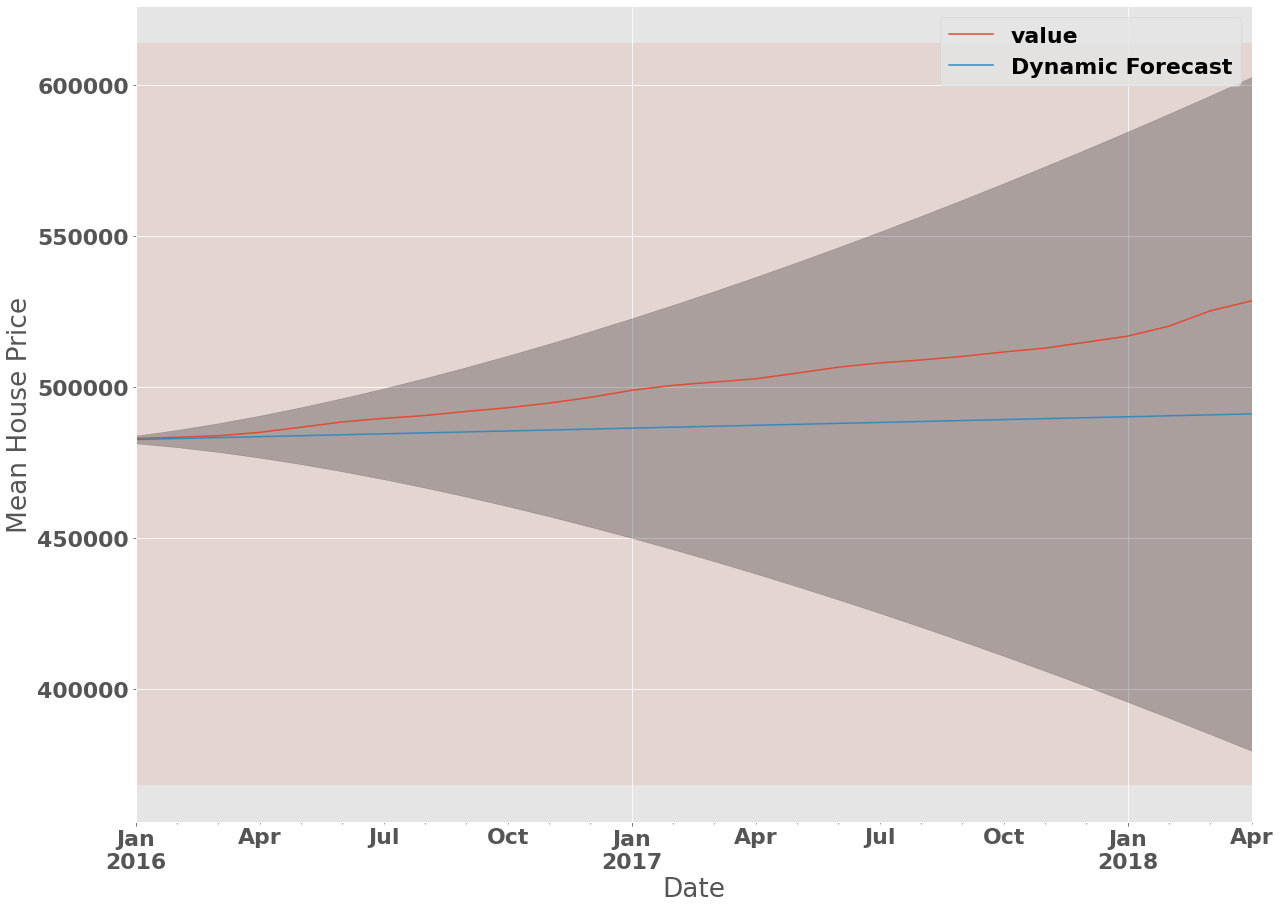

In [174]:
pred_dynamic = model_fit.get_prediction(start=pred_start_date, dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax_dyn = observed.plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax_dyn)

ax_dyn.fill_between(pred_dynamic_ci.index,
					pred_dynamic_ci.iloc[:, 0],
					pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax_dyn.fill_betweenx(ax_dyn.get_ylim(), pred_start_date, end_date,
					 alpha=.1, zorder=-1)


ax_dyn.set_xlabel('Date')
ax_dyn.set_ylabel('Mean House Price')
plt.legend()

plt.show()

The 2 year prediction is off by almost $50,000. The confidence interval is more than $200,000.

Forecasts only seem useful for about 3-6 months for most applications: the confidence interval gets too big past that point.

# Final Result

The model is not great past 3 month forecasts. To get a better result, a different process (not ARIMA-based) or additional data is required. ARIMA has been fully tried on the current data.
Potential data for improving future models: monthly unemployment rates, interest rates, stock index prices, house prices in nearby areas, etc.